# Никитин Дмитрий
Цель работы: изучение алгоритмов и методов кластеризации на практике.
## Вариант 4
Набор данных 4heart2.csv

Данные о болезнях сердца:
1. возраст: возраст пациента (лет)
2. анемия: снижение количества эритроцитов или гемоглобина (логическое значение)
3. высокое кровяное давление: если у пациента гипертония (логическое значение)
4. креатининфосфокиназа (КФК): уровень фермента КФК в крови (мкг/л)
5. диабет: если у пациента диабет (логическое значение)
6. фракция выброса: процент крови, покидающей сердце при каждом сокращении (в процентах)
7. тромбоциты: тромбоциты в крови (килотромбоциты/ мл)
8. пол: женщина или мужчина (бинарный)
9. креатинин сыворотки: уровень креатинина сыворотки в крови (мг/дл)
10. натрий сыворотки: уровень натрия сыворотки в крови (мэкв/л)
11. курение: если пациент курит или нет (логическое)
12. время: период наблюдения (дни)
13. событие смерти: если пациент умер в течение периода наблюдения (логическое значение)


### Часть 1
Сначала используется функция для создания набора данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')

def make_data(n: int, seed: int) -> pd.DataFrame:
    np.random.seed(seed)
    shift_matrix: np.array = np.array([[3, 3],
                                       [6, 9],
                                       [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

train_part1_df: pd.DataFrame = make_data(100, 228)#.reset_index(drop=True)
test_part1_df: pd.DataFrame = make_data(100, 42)
# df = pd.read_csv("4heart2.csv", sep=",")

Набор данных создан, далее проводится стандартизация данных. В результате применения получается DataFrame , содержащий заданное число объектов в каждой группе
(всего 3 группы) с двумя признаками: 'x' и 'y'.

In [2]:
scaler = StandardScaler()

scaled_test_part1_df: pd.DataFrame = pd.DataFrame(scaler.fit_transform(test_part1_df), columns=test_part1_df.columns)
scaled_train_part1_df: pd.DataFrame = pd.DataFrame(scaler.fit_transform(train_part1_df), columns=train_part1_df.columns)

print(train_part1_df.shape)
test_part1_df

(300, 2)


,x,y
79,20.248622,2.860085
12,64.839245,1.530115
204,170.998691,1.174679
137,123.729086,4.339307
99,55.308257,0.928515
...,...,...
114,113.694615,5.152739
94,52.157837,1.586590
129,133.591955,4.814173
172,143.263275,5.225572


Стандартизация данных проведена. При этом стандартизировано как значение x, так и y. При кластеризации они оба стандартизируются. Далее проведём кластеризацию данных.

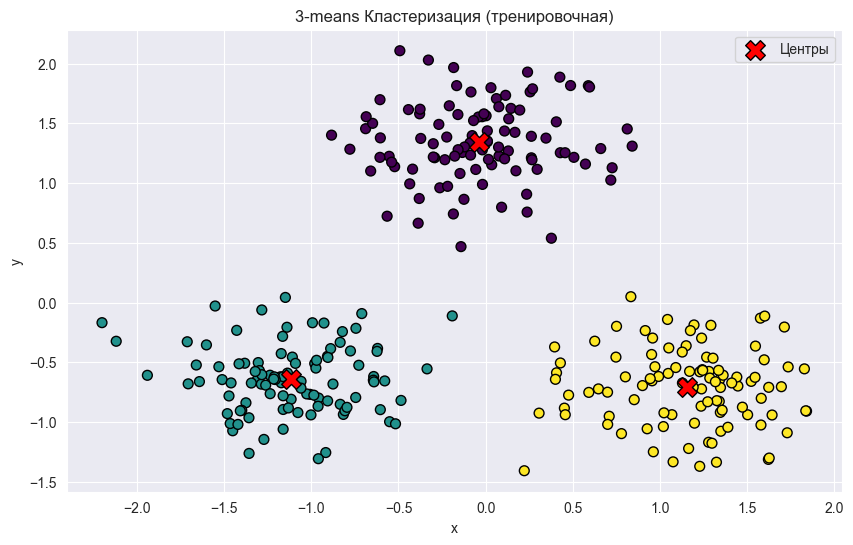

In [3]:
kmeans = KMeans(n_clusters=3, random_state=0)
train_clusters_n3 = kmeans.fit_predict(scaled_train_part1_df)

# Получение центров кластеров
cluster_centers = kmeans.cluster_centers_

def show_cluster_scatter(scaled_df: pd.DataFrame, clusters: pd.Series, cluster_centers_funk: pd.DataFrame, title: str) -> None:
    plt.figure(figsize=(10, 6))

    # Покраска объектов из разных кластеров разными цветами
    plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)

    # Пометка центров кластеров
    plt.scatter(cluster_centers_funk[:, 0], cluster_centers_funk[:, 1], c='red', marker='X', s=200, edgecolor='k', label='Центры')

    plt.legend()

    plt.xlabel(scaled_df.columns[0])
    plt.ylabel(scaled_df.columns[1])

    plt.title(title)

    plt.show()

show_cluster_scatter(scaled_train_part1_df, train_clusters_n3, cluster_centers,'3-means Кластеризация (тренировочная)')

Было проведено обучение и кластеризация тренировочных данных. На графике чётко видно, что имеется 3 кластера.

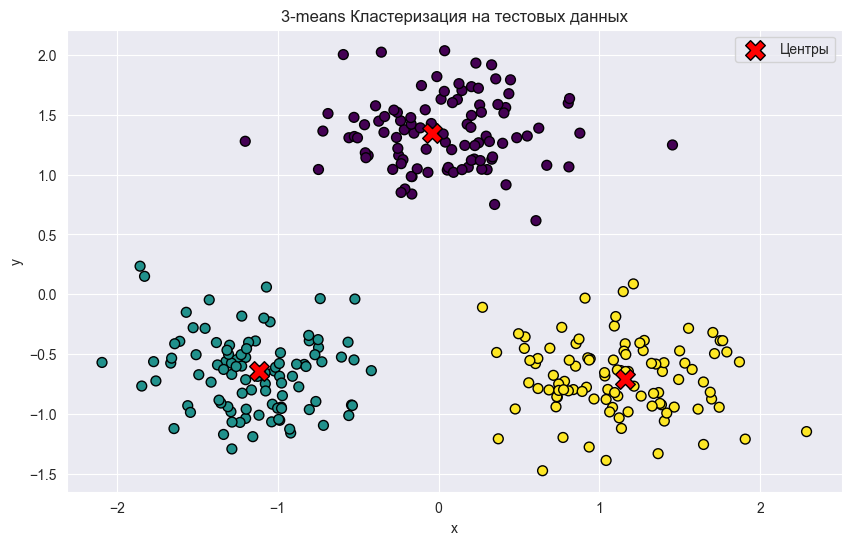

In [4]:
clusters_test_n3 = kmeans.predict(scaled_test_part1_df)

cluster_centers = kmeans.cluster_centers_

show_cluster_scatter(scaled_test_part1_df, clusters_test_n3, cluster_centers, '3-means Кластеризация на тестовых данных')

Далее была проведена кластеризация на тестовых данных. Модель с кластеризацией справляется хорошо. Снова на графике отчётливо видно 3 кластера данных, раскрашенных разным цветом.

Далее будет проведена кластеризация данных для кластеризации при n_clusters=2 и n_clusters=4 и проведено сравнение.

Сначала будет проведена кластеризация данных при n_clusters=2.

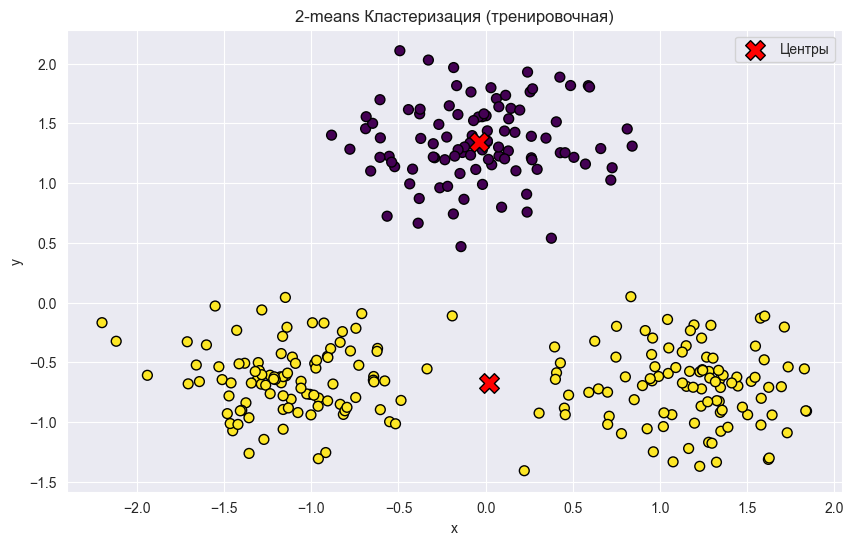

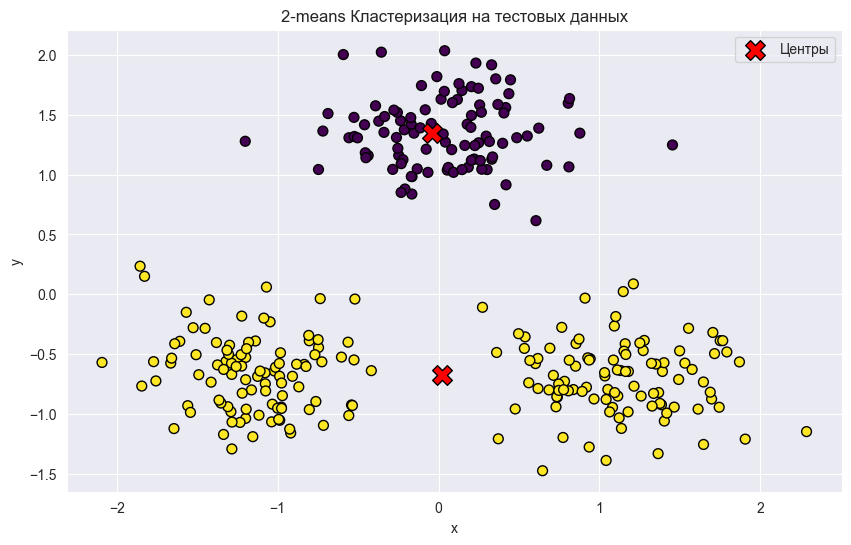

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
train_clusters_n2 = kmeans.fit_predict(scaled_train_part1_df)

cluster_centers = kmeans.cluster_centers_
show_cluster_scatter(scaled_train_part1_df, train_clusters_n2, cluster_centers,'2-means Кластеризация (тренировочная)')

clusters_test_n2 = kmeans.predict(scaled_test_part1_df)

cluster_centers = kmeans.cluster_centers_

show_cluster_scatter(scaled_test_part1_df, clusters_test_n2, cluster_centers, '2-means Кластеризация на тестовых данных')

Была проведена кластеризация данных при n_clusters=2. Далее будет проведена кластеризация данных при n_clusters=4. При n_clusters=2 модель становится явно менее точной, так как фактическое количество кластеров на графике больше. Однако модель не может сделать больше кластеров, чем было выбрано. Поэтому она располагает центры так, чтобы минимизировать сумму квадратов расстояний между точками данных и ближайшим центром. Следовательно, между двумя нижними облаками сходства больше, чем у каждого из них с верхним.

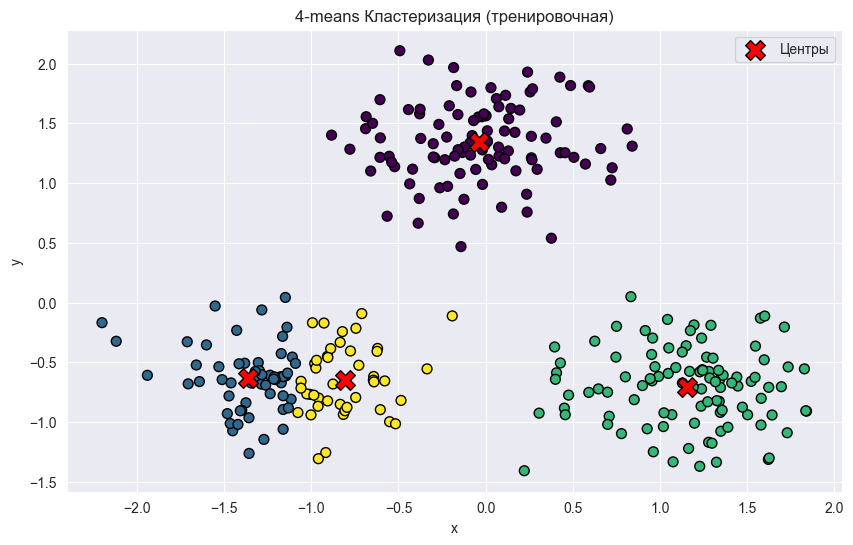

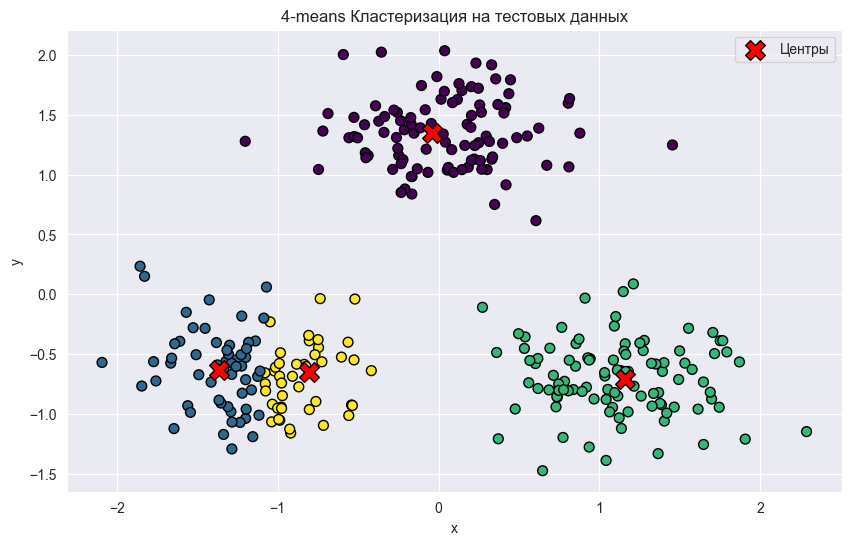

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
train_clusters_n4 = kmeans.fit_predict(scaled_train_part1_df)

cluster_centers = kmeans.cluster_centers_
show_cluster_scatter(scaled_train_part1_df, train_clusters_n4, cluster_centers,'4-means Кластеризация (тренировочная)')

clusters_test_n4 = kmeans.predict(scaled_test_part1_df)

cluster_centers = kmeans.cluster_centers_

show_cluster_scatter(scaled_test_part1_df, clusters_test_n4, cluster_centers, '4-means Кластеризация на тестовых данных')

Кластеризация n_clusters=4 делит нижнее левое облако ещё на 2 части. Это означает, что в нём данные менее однородны, чем в остальных облаках. Оно содержит больше точек и имеет слегка вытянутую форму. Алгоритм старается "равномерно" распределить центры кластеров, что приводит к появлению двух центров (желтого и голубого) в этой области. Это может быть признаком того, что данные имеют слабую естественную границу между этими подгруппами, либо это искусственное разделение, вызванное выбором фиксированного числа кластеров. Таким образом мы можем узнать, какие кластеры различаются сильнее.

В нашем случае самым лучшим вариантом будет разделение на 3 кластера, так как фактически на графике имеется 3 кластера, нужно лишь разграничить их и найти центры. Таким образом: 2 кластера слишком мало, так как снизу визуально имеется 2 группы, 4 кластера слишком много, так как левая группа выглядит естественным единым кластером.

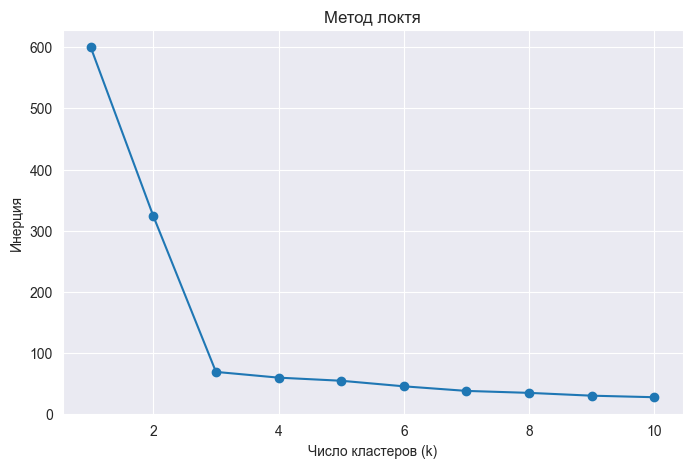

In [7]:
# Список для хранения инерции
inertia = []

# Число кластеров
range_clusters = range(1, 11)

# Расчет инерции для каждого k
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_train_part1_df)
    inertia.append(kmeans.inertia_)

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

На графике изображена инерция, это сумма квадратов расстояний от точек до их центров кластеров. Чем больше кластеров, тем меньше инерция.

На графике ищем точку, где снижение инерции начинает замедляться ("локоть"). Это и есть оптимальное число кластеров k. В нашём случае оптимальное число кластеров равно 3, так как излом находится на точке 3. Это также подтверждается и визуальной информацией графика.

### Часть 2
Далее будет проведена кластеризация для набора данных, предложенного вариантом 4.

Сначала будут открыты и проведена предварительная обработка данных.

In [8]:
df = pd.read_csv("4heart2.csv", sep=",")
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

Пропуски отсутствуют.

In [9]:
num_duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


Так как набор данных является тестовым, дубликатов и пропусков в нём нет. Данные чистые. Далее будет сделан вывод матрицы диаграмм рассеяния.

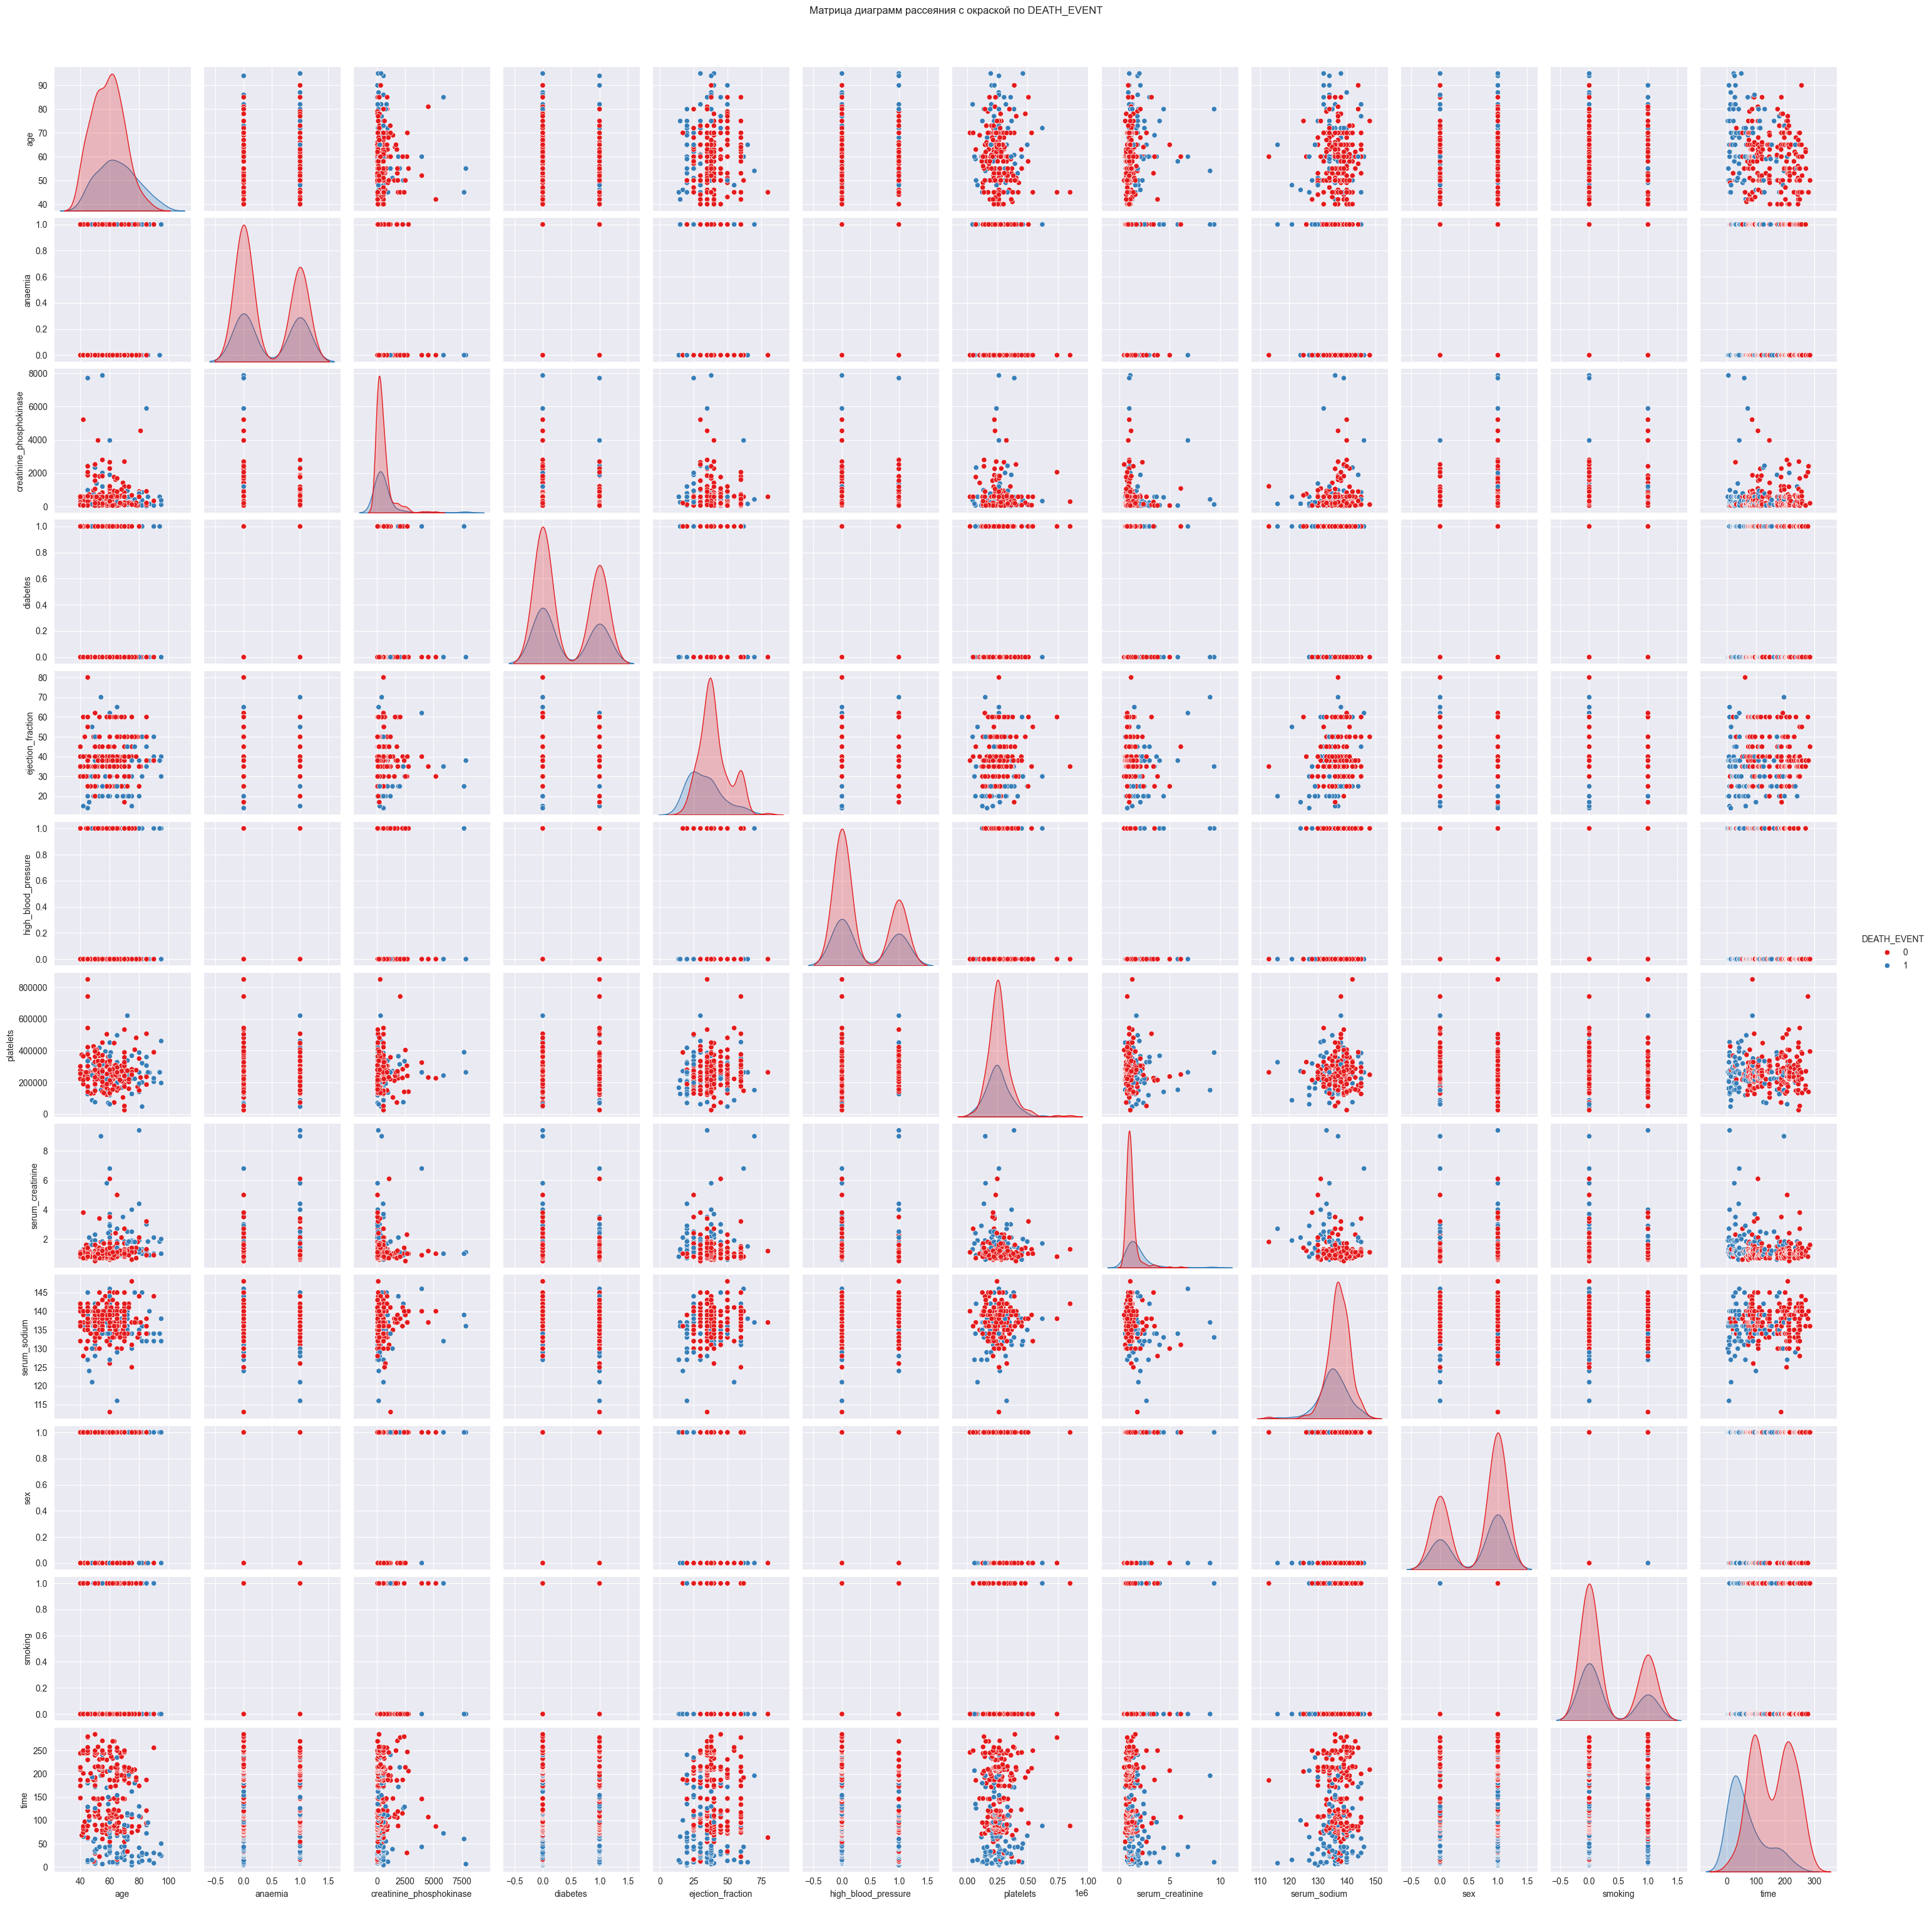

In [10]:
# Выделение целевой переменной
target = df['DEATH_EVENT']

# Исключение целевой переменной из данных
features = df.drop(columns=['DEATH_EVENT'])

# Построение матрицы диаграмм рассеяния
sns.pairplot(df, hue='DEATH_EVENT', palette='Set1', diag_kind='kde')
plt.suptitle('Матрица диаграмм рассеяния с окраской по DEATH_EVENT', y=1.02)
plt.show()

На данной матрице диаграмм рассеяния можно увидеть зависимость летального исхода от различных факторов. Красным цветом изображены летальные случаи, а синим - не летальные. Учесть все факторы одним взглядом на матрицу проблематично. Например, можно заметить, что чем больше период наблюдения за пациентом, тем больше смертность. Возможно это из-за того, что время наблюдения увеличивается по мере серьёзности и излечимости заболевания. Далее будет произведён скейл данных.

In [11]:
# Определяем числовые столбцы, исключая бинарные
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
columns_to_scale = [col for col in numerical_columns if col not in binary_columns]

# Стандартизация только числовых непрерывных данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[columns_to_scale])

# Собираем итоговый DataFrame
scaled_df = features.copy()
scaled_df[columns_to_scale] = scaled_features

scaled_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,0,-0.537688,1,-0.007077,1,-1.109765e+00,-0.284552,1.447094,1,1,1.803451
295,-0.491279,0,1.278215,0,-0.007077,0,6.802472e-02,-0.187726,0.539054,0,0,1.816357
296,-1.333392,0,1.525979,1,1.854958,0,4.902082e+00,-0.575031,0.312044,0,0,1.906697
297,-1.333392,0,1.890398,0,-0.007077,0,-1.263389e+00,0.005926,0.766064,1,1,1.932509


Производится скейл данных, но только числовых значений, не изменяя bool значения. Далее будет выполнена кластеризация методом k-means.

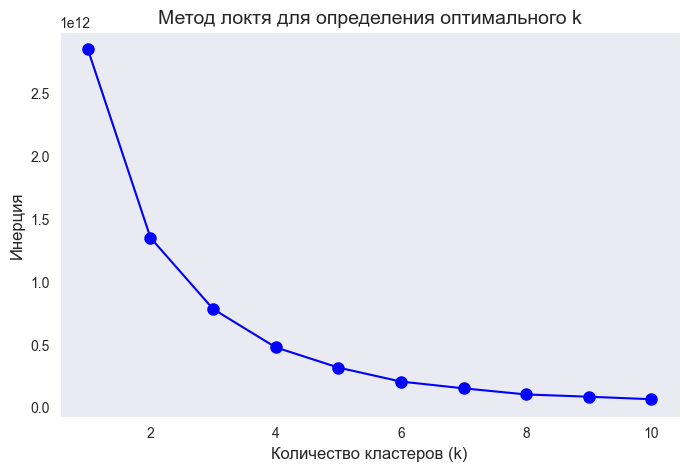

In [12]:
# Вычисление метрики "инерции" для разных значений k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Количество кластеров (k)', fontsize=12)
plt.ylabel('Инерция', fontsize=12)
plt.title('Метод локтя для определения оптимального k', fontsize=14)
plt.grid()
plt.show()

Было выбрано 4 кластера, так как по методу локтя это является оптимальным значением.

In [13]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_df[columns_to_scale])

scaled_df['Cluster'] = clusters

cluster_means = scaled_df.groupby('Cluster').mean()

print("Средние значения по каждому кластеру:")
cluster_means

Средние значения по каждому кластеру:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
Cluster,,,,,,,,,,,,
0,-0.293135,0.176471,3.229052,0.529412,-0.111629,0.235294,0.351005,0.050352,0.539054,0.647059,0.235294,0.008021
1,-0.125232,0.491935,-0.228666,0.395161,0.120563,0.427419,0.063636,-0.256129,0.310213,0.620968,0.354839,-0.698617
2,0.942066,0.479167,-0.225919,0.375000,-0.112874,0.395833,-0.243887,1.189021,-1.154062,0.666667,0.270833,-0.634946
3,-0.224610,0.381818,-0.142683,0.445455,-0.069401,0.263636,-0.019558,-0.237900,0.070588,0.672727,0.318182,1.063359


Кластер 0 включает людей с возрастом ниже среднего, с высокой частотой диабета и анемии, а также с умеренно повышенным уровнем креатинкиназы. У этих людей фракция выброса крови близка к норме, но несколько понижена. Также среди этого кластера наблюдается умеренное распространение гипертонии. Уровень тромбоцитов в пределах нормы, а креатинин в сыворотке и уровень натрия находятся в пределах нормы. Большинство людей в кластере — мужчины, а доля курящих людей небольшая. Время наблюдения в среднем близко к минимальному, что может указывать на относительно быструю выписку.

Кластер 1 включает людей с возрастом, близким к среднему по набору данных, с более выраженной частотой анемии и с низким уровнем креатинкиназы. У этих людей наблюдается умеренная частота диабета, а фракция выброса крови выше средней. Гипертония встречается в этом кластере часто, что может указывать на проблемы с артериальным давлением. Уровень тромбоцитов и креатинина в сыворотке ниже среднего, а натрий в сыворотке — в пределах нормы. Большинство людей в этом кластере — мужчины, курящих людей больше, чем в кластере 0. Время наблюдения у этого кластера относительно низкое, что может свидетельствовать о более позднем периоде выписки.

Кластер 2 включает людей с выше среднего возраста, с частотой анемии, близкой к средней, и с низким уровнем креатинкиназы. Среди этих людей наблюдается низкая частота диабета. Фракция выброса крови в этом кластере также близка к среднему значению. Гипертония встречается достаточно часто, и уровень тромбоцитов в среднем ниже нормы. Креатинин в сыворотке значительно выше среднего, что может указывать на проблемы с функцией почек. Натрий в сыворотке крови в этом кластере значительно ниже, что может быть связано с возможными нарушениями водно-солевого обмена. Люди в этом кластере в основном мужчины, курящих людей умеренно, и время наблюдения довольно низкое, что может свидетельствовать о относительно коротком периоде наблюдения для большинства из них.

Кластер 3 включает людей с возрастом, близким к среднему по набору данных, с умеренной частотой анемии и низким уровнем креатинкиназы. Частота диабета в этом кластере немного ниже средней, а фракция выброса крови близка к норме. Гипертония встречается в умеренном количестве, а уровень тромбоцитов близок к норме. Креатинин в сыворотке крови в среднем ниже, что может свидетельствовать о хорошем функционировании почек. Уровень натрия в сыворотке нормальный, а доля мужчин в этом кластере больше, чем женщин. Курящих людей умеренно, а время наблюдения выше среднего, что может указывать на более продолжительный период наблюдения за пациентами в этом кластере.

In [14]:
# Силуэтный коэффициент
sil_score = silhouette_score(scaled_df[columns_to_scale], clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# Индекс Дависа-Боулдина
db_index = davies_bouldin_score(scaled_df[columns_to_scale], clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: 0.1390
Davies-Bouldin Index: 1.8348


Silhouette Score: 0.1390. Это значение указывает на то, что кластеризация не является очень хорошей. Силуэтный коэффициент может варьироваться от -1 до +1, где значения близкие к +1 свидетельствуют о том, что объекты хорошо сгруппированы внутри кластеров, а значения близкие к -1 говорят о том, что объекты могут быть неправильно кластеризованы. Значение 0.1390 указывает на то, что есть неопределенность между кластерами, и кластеризация в целом не является оптимальной.

Davies-Bouldin Index: 1.8348. Этот индекс измеряет, насколько хорошо разделены кластеры. Меньшие значения говорят о лучшем разделении. Значение 1.8348 относительно высокое, что указывает на то, что кластеры не слишком хорошо разделены и существует значительная перегрузка между ними.

### Кластеризация иерархическим агломеративным методом.

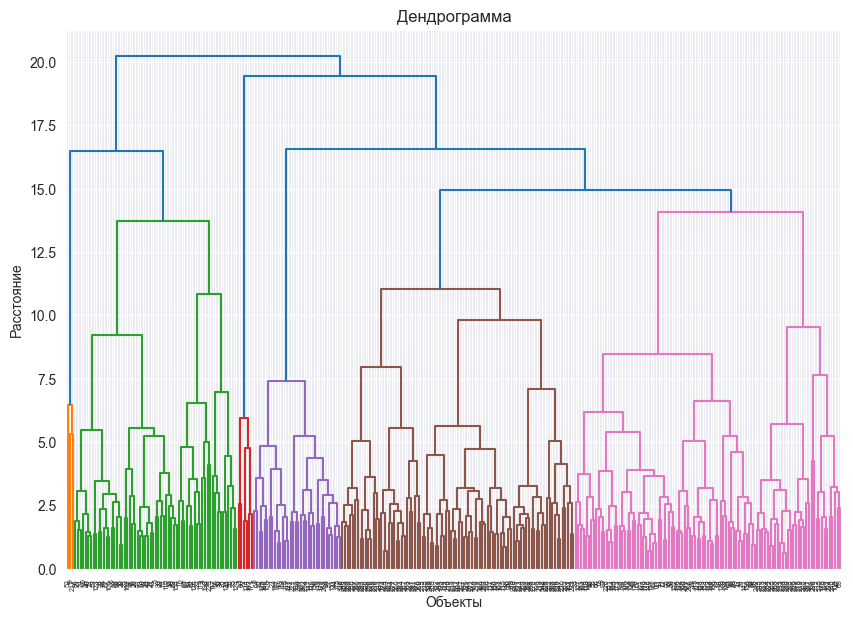

Silhouette Score: 0.0984
Davies-Bouldin Index: 1.9578
Средние значения по каждому кластеру:
        age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1  0.773165  0.545455                 -0.197701  0.424242          -0.185329   
2 -0.070223  0.000000                  5.448908  0.166667          -0.359735   
3  0.026372  0.588235                 -0.262871  0.352941           1.760362   
4 -0.266861  0.378238                 -0.055480  0.435233          -0.235555   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex  \
1             0.469697  -0.249754          0.659796     -0.496249  0.712121   
2             0.166667   0.167638         -0.352331      0.160704  1.000000   
3             0.441176  -0.090289         -0.334105      0.458933  0.529412   
4             0.300518   0.096102         -0.155819      0.083858  0.637306   

    smoking      time  
1  0.378788 -0.986753  
2  0.666667 -0.652961  
3  0.264706 -0.200371  
4  0.300518  0.

In [15]:
scaled_df = scaled_df.drop(columns=["Cluster"])
Z = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

optimal_k = 4

clusters = fcluster(Z, criterion='maxclust', t=optimal_k)

cluster_means = pd.DataFrame(columns=scaled_df.columns)

for cluster_num in range(1, optimal_k + 1):
    cluster_data = scaled_df[clusters == cluster_num]
    cluster_means.loc[cluster_num] = cluster_data.mean()



sil_score = silhouette_score(scaled_df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

db_index = davies_bouldin_score(scaled_df, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

print("Средние значения по каждому кластеру:")
print(cluster_means)

Дендраграмма показывает 6 групп, в отличие от метода локтя. Однако это можно исключить благодаря тому, что 2 кластера достаточно малы и их можно объединить с более крупными. Были получены низкие значения метрик качества кластеризации. Silhouette Score (0.0984) близок к 0, что указывает на плохое разделение объектов между кластерами, а кластеризация может быть неоптимальной. Davies-Bouldin Index (1.9578) также высок, что свидетельствует о том, что кластеры имеют большое внутреннее сходство и плохо отделены друг от друга. Эти результаты могут означать, что выбранное количество кластеров (4) не является оптимальным для данных.

Кластер 1: Этот кластер включает пациентов с относительно высоким возрастом и умеренными показателями по анамнестическим признакам, таким как анемия и диабет. Среднее значение по creatinine_phosphokinase отрицательное, что может свидетельствовать о более низком уровне активности этого фермента. Пациенты из этого кластера также имеют умеренные значения по ejection_fraction и high_blood_pressure, что говорит о наличии некоторых проблем с сердечно-сосудистой системой, но без крайних отклонений. Важно отметить, что здесь больше людей с более высоким уровнем натрия в крови, но с невысоким уровнем курения и временем болезни.

Кластер 2: Пациенты из этого кластера, похоже, имеют более низкий возраст и гораздо более высокие значения по creatinine_phosphokinase, что может указывать на наличие серьезных проблем с сердечно-сосудистой системой или другими заболеваниями. Они также имеют относительно низкие значения по serum_sodium и положительные значения по признаку пола (sex = 1), что может свидетельствовать о том, что в этом кластере преобладают мужчины. Этот кластер также отличается по более низким значениям по smoking и time, что может говорить о более ранних стадиях заболевания.

Кластер 3: В этом кластере пациенты имеют хороший уровень ejection_fraction, что говорит о сохранности сердечной функции. Средние значения по признакам возраста и уровня натрия в крови показывают, что в этом кластере находятся в основном пожилые люди с хорошим уровнем контроля по сердечно-сосудистым заболеваниям. Пациенты с более высокими значениями по high_blood_pressure также могут быть в этом кластере, что указывает на относительно стабильное состояние с учетом сердечной активности.

Кластер 4: Этот кластер включает пациентов с более низким возрастом и умеренными показателями для большинства признаков. Здесь также наблюдаются умеренные значения для platelets и serum_creatinine, что говорит о том, что эти пациенты не имеют значительных отклонений в анализах. Они также имеют относительно нормальные уровни натрия в крови и низкие показатели по признакам smoking и time, что может свидетельствовать о более хорошем состоянии здоровья.



## Вывод
В ходе работы была проведена кластеризация данных о пациентах с сердечно-сосудистыми заболеваниями для изучения различных методов обработки и анализа данных. Для этого использовались данные о возрасте, уровне креатинкиназы, фракции выброса крови и других медицинских показателях пациентов.

На первом этапе был выполнен предварительный анализ и стандартизация данных. Затем применены два основных метода кластеризации: алгоритм k-means и иерархическая агломеративная кластеризация. Оба метода показали, что для этого набора данных оптимальное количество кластеров — 3. С использованием метода локтя и графиков было подтверждено, что именно это количество кластеров лучше всего отражает структуру данных, в то время как использование двух или четырёх кластеров давало менее точные результаты.

Для оценки качества кластеризации были использованы метрики, такие как Silhouette Score и Davies-Bouldin Index. Оба показателя показали, что разделение на кластеры не является идеальным, однако всё же даёт достаточно полезной информации о группах пациентов с различными признаками. Silhouette Score оказался низким, что говорит о неопределённости между кластерами, а Davies-Bouldin Index указывает на плохое разделение между ними. Это свидетельствует о том, что модель может быть не совсем точной, но всё же позволяет выделить некоторые ключевые группы.

В конечном итоге, полученные результаты подтверждают, что кластеризация может быть полезным инструментом для анализа таких медицинских данных, хотя для улучшения результатов стоит подумать о более сложных методах или дополнительной обработке данных.

## Дополнительное задание на 4
Будут выполнены дополнительные задания 6, 7 и 10

**Задание 6.** Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до 10). Построить график - по оси х - кол-во кластеров, по у - значение метрики (отразить все 4 метрики на одном графике
разным цветом).

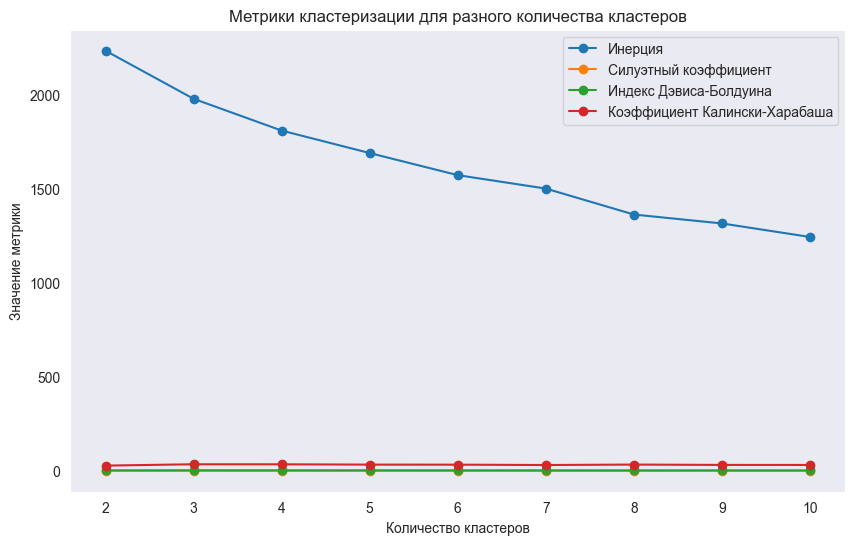

In [16]:
# Списки для хранения значений
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Вычисление метрик для каждого количества кластеров
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(scaled_df)

    # Сумма квадратов расстояний до центроидов
    inertia.append(kmeans.inertia_)

    # Силуэтный коэффициент
    silhouette_scores.append(silhouette_score(scaled_df, labels))

    # Давиес-Болдин индекс (чем меньше, тем лучше)
    davies_bouldin_scores.append(davies_bouldin_score(scaled_df, labels))

    # Calinski-Harabasz индекс (чем больше, тем лучше)
    calinski_harabasz_scores.append(calinski_harabasz_score(scaled_df, labels))


# Построение графика
def make_coeff_graffic(inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), inertia, label='Инерция', marker='o')
    plt.plot(range(2, 11), silhouette_scores, label='Силуэтный коэффициент', marker='o')
    plt.plot(range(2, 11), davies_bouldin_scores, label='Индекс Дэвиса-Болдуина', marker='o')
    plt.plot(range(2, 11), calinski_harabasz_scores, label='Коэффициент Калински-Харабаша', marker='o')

    plt.title('Метрики кластеризации для разного количества кластеров')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Значение метрики')
    plt.legend()
    plt.grid()
    plt.show()
make_coeff_graffic(inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores)

К сожалению, подобное отображение невозможно интерпретировать из-за разной размерности метрик. Необходимо провести min-max скейл, чтобы метрики находились в одном диапазоне. Также будет выведена таблица с исходными значениями.

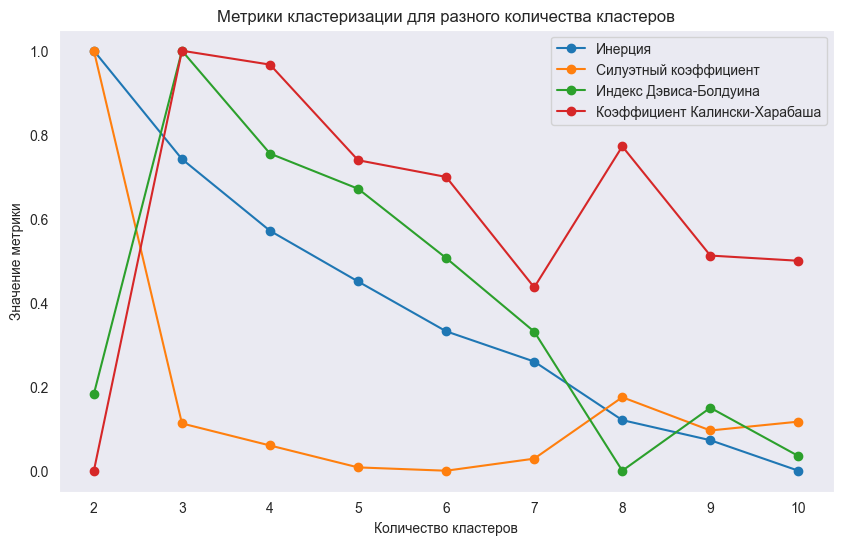

,2,3,4,5,6,7,8,9,10
Inertia,2235.085143,1979.358815,1810.144146,1690.508339,1572.919773,1501.521467,1363.344354,1315.951581,1243.927591
Silhouette,0.257313,0.117450,0.109183,0.100958,0.099711,0.104241,0.127290,0.114813,0.118129
Davies-Bouldin,1.727227,2.168163,2.035998,1.990817,1.901766,1.807231,1.628523,1.709416,1.647381
Calinski-Harabasz,27.298144,34.481680,34.244124,32.608972,32.322869,30.434364,32.845454,30.977999,30.889145


In [17]:
min_max_scaler = MinMaxScaler()
make_coeff_graffic(min_max_scaler.fit_transform(np.array(inertia).reshape(-1, 1)).flatten(), min_max_scaler.fit_transform(np.array(silhouette_scores).reshape(-1, 1)).flatten(), min_max_scaler.fit_transform(np.array(davies_bouldin_scores).reshape(-1, 1)).flatten(), min_max_scaler.fit_transform(np.array(calinski_harabasz_scores).reshape(-1, 1)).flatten())
# Создание DataFrame
metric_df = pd.DataFrame({
    'Inertia': np.array(inertia),
    'Silhouette': np.array(silhouette_scores),
    'Davies-Bouldin': np.array(davies_bouldin_scores),
    'Calinski-Harabasz': np.array(calinski_harabasz_scores)
})
metric_df = metric_df.reset_index(drop=True)
metric_df.index = metric_df.index + 2
metric_df.T

На данном графике инерция не имеет сильных спадов, поэтому судить о данных только по ней является плохой стратегией. Ранее значение оптимальным значением k было выбрано число 4.

Сначала проводится оценка k = 2 так как в ней пик силуэтного коэффициента. Это нормально, ведь в той точке у данных всего 2 группы, однако по остальным метрикам точка не является оптимальной из-за низкого значения коэффициента Калински-Хабарша. Далее, если посмотреть на точки 3 и 4, то можно сказать, что в них находятся довольно высокие значения силуэтного коэффициента. Также локальный пик находится в точке 8.

Коэффициент Калински-Хабарша достигает своего пика в точке 3, а в точке 4 сохраняет своё высокое значение. Локальный пик также имеется в точке 8.

Индекс Дэвиса-Болдуина имеет свой минимум в точке 8, и имеет значительное снижение в точке 4.

Таким образом, данные коэффициенты показывают, что данные можно было эффективно разделить как на 4, так и на 8 групп. Однако 4 является более оптимальным количеством, так как снижает сложность модели, и имеет приемлемые значения коэффициентов.

**Задание 7.** Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить полученные итоговые метрики с теми, что были получены на данных, нормализованных с помощью StandardScaler.

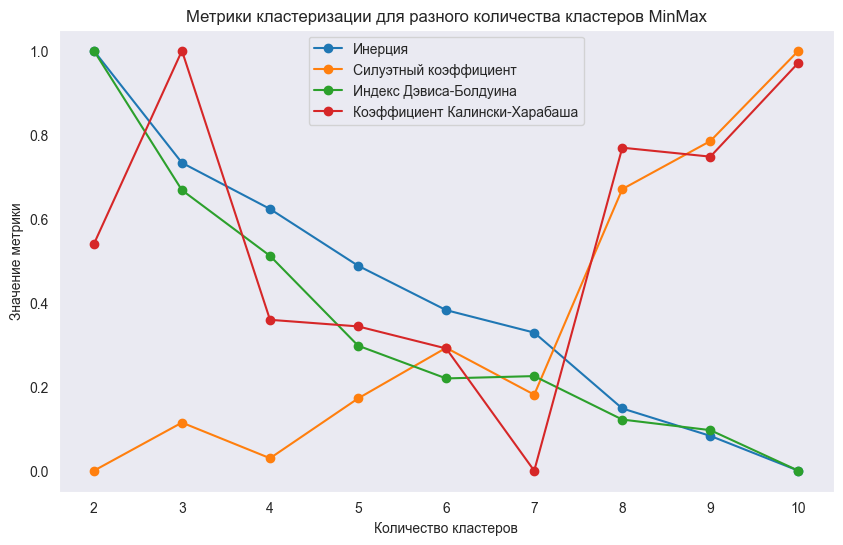

       Inertia  Silhouette  Davies-Bouldin  Calinski-Harabasz
2     1.000000    0.000000        1.000000           0.539787
3     0.733117    0.114581        0.668005           1.000000
4     0.623226    0.029764        0.511608           0.359322
5     0.488056    0.172168        0.297748           0.343626
6     0.382350    0.292639        0.219767           0.291094
7     0.328820    0.181027        0.225304           0.000000
8     0.148242    0.670503        0.121827           0.769091
9     0.082888    0.784966        0.096598           0.747801
10    0.000000    1.000000        0.000000           0.971395
mean  0.420744    0.360627        0.348984           0.558013


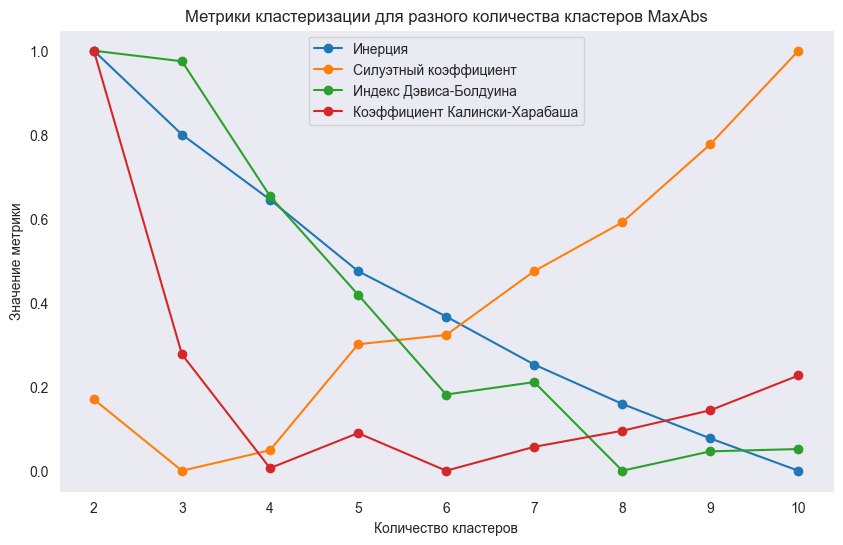

       Inertia  Silhouette  Davies-Bouldin  Calinski-Harabasz
2     1.000000    0.169806        1.000000           1.000000
3     0.800425    0.000000        0.974897           0.277095
4     0.645453    0.048803        0.653774           0.006145
5     0.475226    0.301139        0.419104           0.089617
6     0.367087    0.323201        0.181411           0.000000
7     0.252818    0.475148        0.211020           0.056879
8     0.159083    0.591389        0.000000           0.095137
9     0.076875    0.777378        0.046137           0.143968
10    0.000000    1.000000        0.051608           0.226723
mean  0.419663    0.409652        0.393106           0.210618


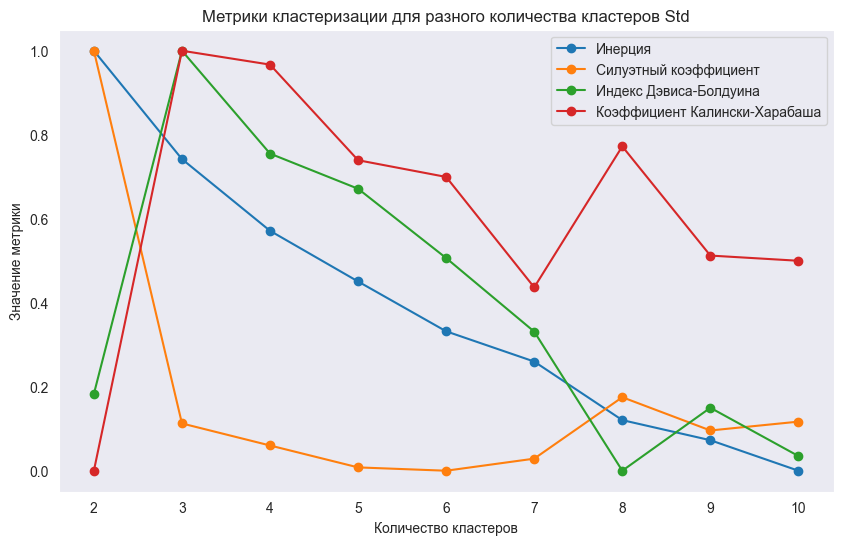

       Inertia  Silhouette  Davies-Bouldin  Calinski-Harabasz
2     1.000000    1.000000        0.182906           0.000000
3     0.741992    0.112557        1.000000           1.000000
4     0.571268    0.060100        0.755087           0.966930
5     0.450565    0.007917        0.671361           0.739306
6     0.331927    0.000000        0.506343           0.699478
7     0.259892    0.028743        0.331162           0.436584
8     0.120482    0.174992        0.000000           0.772225
9     0.072667    0.095825        0.149901           0.512262
10    0.000000    0.116863        0.034945           0.499893
mean  0.394310    0.177444        0.403523           0.625187


In [18]:
min_max_scaler = MinMaxScaler()
max_abs_scaler = MaxAbsScaler()
std_scaler = StandardScaler()

features = df.drop(columns=['DEATH_EVENT'])
numerical_columns = features.select_dtypes(include=['float64', 'int64']).columns
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
columns_to_scale = [col for col in numerical_columns if col not in binary_columns]

min_max_scaled_features = min_max_scaler.fit_transform(features[columns_to_scale])
max_abs_scaled_features = max_abs_scaler.fit_transform(features[columns_to_scale])
std_scaled_features = std_scaler.fit_transform(features[columns_to_scale])

# Сбор итоговый DataFrame min_max
min_max_scaled_df = features.copy()
min_max_scaled_df[columns_to_scale] = min_max_scaled_features

# Сбор итоговый DataFrame max_abs
max_abs_scaled_df = features.copy()
max_abs_scaled_df[columns_to_scale] = max_abs_scaled_features

# Сбор итоговый DataFrame std
std_scaled_df = features.copy()
std_scaled_df[columns_to_scale] = std_scaled_features

# Построение графика и вывод метрик
def make_coeff_graffic_2(inertia_f, silhouette_scores_f, davies_bouldin_scores_f, calinski_harabasz_scores_f, name):
    min_max_scaler_f = MinMaxScaler()

    # Нормализуем метрики с помощью MinMaxScaler
    inertia_f = min_max_scaler_f.fit_transform(np.array(inertia_f).reshape(-1, 1)).flatten()
    silhouette_scores_f = min_max_scaler_f.fit_transform(np.array(silhouette_scores_f).reshape(-1, 1)).flatten()
    davies_bouldin_scores_f = min_max_scaler_f.fit_transform(np.array(davies_bouldin_scores_f).reshape(-1, 1)).flatten()
    calinski_harabasz_scores_f = min_max_scaler_f.fit_transform(np.array(calinski_harabasz_scores_f).reshape(-1, 1)).flatten()

    # Вычисляем средние значения для метрик
    mean_inertia = np.mean(inertia_f)
    mean_silhouette = np.mean(silhouette_scores_f)
    mean_davies_bouldin = np.mean(davies_bouldin_scores_f)
    mean_calinski_harabasz = np.mean(calinski_harabasz_scores_f)

    # Добавляем средние значения в конец списка
    inertia_f = np.append(inertia_f, mean_inertia)
    silhouette_scores_f = np.append(silhouette_scores_f, mean_silhouette)
    davies_bouldin_scores_f = np.append(davies_bouldin_scores_f, mean_davies_bouldin)
    calinski_harabasz_scores_f = np.append(calinski_harabasz_scores_f, mean_calinski_harabasz)

    # Создание DataFrame с метриками
    metric_df = pd.DataFrame({
        'Inertia': inertia_f,
        'Silhouette': silhouette_scores_f,
        'Davies-Bouldin': davies_bouldin_scores_f,
        'Calinski-Harabasz': calinski_harabasz_scores_f
    })

    # Обновление индекса: добавление 'mean' в конец
    metric_df.index = list(range(2, 11)) + ['mean']

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), inertia_f[:-1], label='Инерция', marker='o')
    plt.plot(range(2, 11), silhouette_scores_f[:-1], label='Силуэтный коэффициент', marker='o')
    plt.plot(range(2, 11), davies_bouldin_scores_f[:-1], label='Индекс Дэвиса-Болдуина', marker='o')
    plt.plot(range(2, 11), calinski_harabasz_scores_f[:-1], label='Коэффициент Калински-Харабаша', marker='o')

    plt.title(f'Метрики кластеризации для разного количества кластеров {name}')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Значение метрики')
    plt.legend()
    plt.grid()
    plt.show()

    # Печать итоговой таблицы с метриками
    print(metric_df)

# Функция для получения метрик
def get_metrics(df_f, name):
    # Списки для хранения значений
    inertia_f = []
    silhouette_scores_f = []
    davies_bouldin_scores_f = []
    calinski_harabasz_scores_f = []

    # Вычисление метрик для каждого количества кластеров
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(df_f)

        # Сумма квадратов расстояний до центроидов
        inertia_f.append(kmeans.inertia_)

        # Силуэтный коэффициент
        silhouette_scores_f.append(silhouette_score(df_f, labels))

        # Давиес-Болдин индекс (чем меньше, тем лучше)
        davies_bouldin_scores_f.append(davies_bouldin_score(df_f, labels))

        # Calinski-Harabasz индекс (чем больше, тем лучше)
        calinski_harabasz_scores_f.append(calinski_harabasz_score(df_f, labels))

    make_coeff_graffic_2(inertia_f, silhouette_scores_f, davies_bouldin_scores_f, calinski_harabasz_scores_f, name)


# Вычисление метрик для каждого нормализованного набора данных
get_metrics(min_max_scaled_df, "MinMax")
get_metrics(max_abs_scaled_df, "MaxAbs")
get_metrics(std_scaled_df, "Std")


**Inertia** показатель у всех типов нормализации демонстрирует улучшение при применении MinMax и MaxAbs по сравнению с исходными значениями (Std), где значения инерции значительно выше, особенно для более высоких групп.

**Silhouette** значения показывают, что MinMax и MaxAbs дают более высокие оценки, особенно для групп с количеством более двух, что говорит о лучшем разделении кластеров.

**Davies-Bouldin** показатель показывает, что MinMax и MaxAbs нормализация имеют более низкие значения по сравнению с std, что является признаком лучшего разделения кластеров.

**Calinski-Harabasz** показатель качества кластеризации, и хотя MinMax и MaxAbs дают переменные значения, MaxAbs в целом дает более стабильные результаты с умеренным улучшением.

MinMax лучше всего подходит для случаев, когда важно, чтобы данные находились в пределах [0, 1]. Это может быть полезно, когда значения признаков имеют разные масштабы и необходимо сохранить пропорции между ними. Эта нормализация обеспечивает достаточно высокие значения силуэта и низкие значения Davies-Bouldin, что говорит о хорошем разделении кластеров.
MaxAbs хорошо работает, если данные уже имеют положительные значения и важно сохранить их абсолютные масштабы. Однако, этот метод может быть менее эффективен для данных с отрицательными значениями.
Std не всегда оптимален, так как в нем могут сохраняться различия в масштабах данных, что может затруднить кластеризацию. Отлично подходит, когда данные близки к нормальному распределению, содержат как положительные, так и отрицательные значения, и когда есть цель сохранить корреляцию и уменьшить влияние выбросов. Это хороший выбор для моделей, чувствительных к масштабу.

**Задание 10.** Выполнить кластеризацию с помощью метода DBSCAN. Добавить описание метода (теор.часть).
Сравнить результаты с полученными ранее.

**Теоретическая часть:** DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN — это алгоритм кластеризации, который основывается на плотности данных и является одним из наиболее популярных методов для обнаружения кластеров в данных с неявно заданной геометрией и шума (выбросов). В отличие от методов, таких как K-means, DBSCAN не требует заранее заданного количества кластеров.

**Основные параметры:**

eps (ε) — максимальное расстояние между двумя точками, которые могут быть отнесены к одному кластеру. Это радиус окрестности для каждой точки, в пределах которого она будет считаться соседней.

min_samples — минимальное количество точек, которые должны быть в окрестности точки, чтобы она могла быть центром кластера.

**Принцип работы DBSCAN:**

Алгоритм выбирает случайную точку.
Проверяет количество соседей в радиусе eps.
Если соседей достаточно (не менее min_samples), то точка становится ядром нового кластера.
Все точки, попадающие в окрестность ядра, также включаются в кластер.
Точки, которые не могут быть отнесены к ни одному кластеру, помечаются как шум.

**Преимущества DBSCAN:**

Не требует заранее заданного числа кластеров.
Эффективен в случае кластеров произвольной формы.
Могут быть обнаружены выбросы (шум).

**Недостатки:**

Алгоритм чувствителен к выбору параметров eps и min_samples.
Алгоритм может не работать хорошо в случае данных с сильно различающимися плотностями.

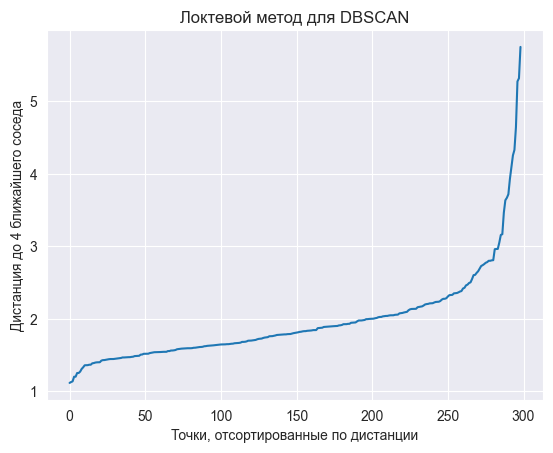

In [19]:

# Строим ближайших соседей
neigh = NearestNeighbors(n_neighbors=4)  # Используем 4 ближайших соседа
nbrs = neigh.fit(std_scaled_df)
distances, indices = nbrs.kneighbors(std_scaled_df)

# Расстояния до 4-го ближайшего соседа
distances = np.sort(distances[:, 3], axis=0)

# Строим график
plt.plot(distances)
plt.ylabel('Дистанция до 4 ближайшего соседа')
plt.xlabel('Точки, отсортированные по дистанции')
plt.title('Локтевой метод для DBSCAN')
plt.show()

Был построен график, на котором по оси Y показаны расстояния до ближайшего соседа (например, 4-го ближайшего), а по оси X - индексы точек. Позволяет выявить прыжок (или "излом"), который указывает на переход от плотных областей данных к более редким областям. Таким образом eps = 2.6.

Обычно значение min_samples ставится таким образом, чтобы оно было равно числу признаков + 1, лучшее значение для min_samples = len(scaled_df.columns)+1, что равняется 12.

In [20]:
dbscan = DBSCAN(eps=2.6, min_samples=len(scaled_df.columns)+1)

dbscan_results = dbscan.fit_predict(std_scaled_df)
clusters = pd.DataFrame(dbscan_results, columns=["Cluster"])

# Силуэтный коэффициент
silhouette_score_db = silhouette_score(std_scaled_df, dbscan_results)

# Давиес-Болдин индекс (чем меньше, тем лучше)
davies_bouldin_score_db = davies_bouldin_score(std_scaled_df, dbscan_results)

# Calinski-Harabasz индекс (чем больше, тем лучше)
calinski_harabasz_score_db = calinski_harabasz_score(std_scaled_df, dbscan_results)
print(clusters['Cluster'].value_counts(), "\n")
print("silhouette_score_db", silhouette_score_db)
print("davies_bouldin_score_db", davies_bouldin_score_db)
print("calinski_harabasz_score_db", calinski_harabasz_score_db)

Cluster
 0    277
-1     22
Name: count, dtype: int64 

silhouette_score_db 0.3966016035522486
davies_bouldin_score_db 2.5809124256385947
calinski_harabasz_score_db 21.333395474121623


При использовании рекомендованных параметров dbscan разделил данные на 1 кластер и пометил незначительную часть шумом. Это говорит о том, что данные в этом датасете очень плотные и сложно распределены.

Данные при работе с KMeans.

       Silhouette  Davies-Bouldin  Calinski-Harabasz
     0.15390731012760359 1.8391375935551444 48.886747562701316

Несмотря на превосходящие параметры силуэтного коэффициента, dbscan показал себя с не очень хорошей стороны. Данные были помещены в один кластер, значение Devis-Bouldin ниже у KMeans, как и Calinski-Harabasz выше у KMeans. Для данного набора данных всё-таки лучше использовать KMeans.